In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Load data

In [2]:
data_true = pd.read_csv('dataset/True.csv')
data_fake = pd.read_csv('dataset/Fake.csv')

In [3]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
# Assign class to dataset
data_fake['class'] = 0
data_true['class'] = 1

In [6]:
data_true.shape, data_fake.shape

((21417, 5), (23481, 5))

### Keep data for munual testing

In [7]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis=0, inplace=True)

In [8]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_fake.drop([i], axis=0, inplace=True)

In [9]:
# data_fake_manual_testing.head()
data_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


### Data pre-processing

In [10]:
data_merge = pd.concat([data_fake, data_true], axis=0)
data_merge.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
# Dropping unwanted columns
data = data_merge.drop(['title', 'subject', 'date'], axis=1)
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [12]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [13]:
# !pip install nltk

In [14]:
# Clean text
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """
    Clean and preprocess text data.

    Parameters:
    - text (str): Input text to be cleaned.

    Returns:
    - str: Cleaned text.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove square brackets and content inside them
    text = re.sub(r'\[.*?\]', '', text)

    # Replace non-word characters with space
    text = re.sub(r'\W', ' ', text)

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove punctuation
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)

    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text


[nltk_data] Downloading package stopwords to /home/oliver/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
data['text'] = data['text'].apply(clean_text)
data.head()

,text,class
0,donald trump wish americans happy new year lea...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [16]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True, drop=True)
data.head()

,text,class
0,beirut reuters syrian troops crossed eastern s...,1
1,london reuters britain expressed grave concern...,1
2,behold democrats best choice president united ...,0
3,washington reuters u defense department finali...,1
4,paris reuters two years militants killed peopl...,1


/home/oliver/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/oliver/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='class', ylabel='count'>

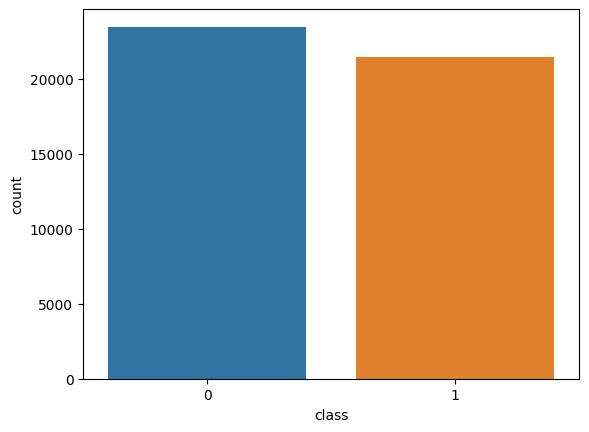

In [17]:
sns.countplot(data=data, 
              x='class', 
              order=data['class'].value_counts().index)


In [18]:
# !pip install wordcloud

### Word Cloud

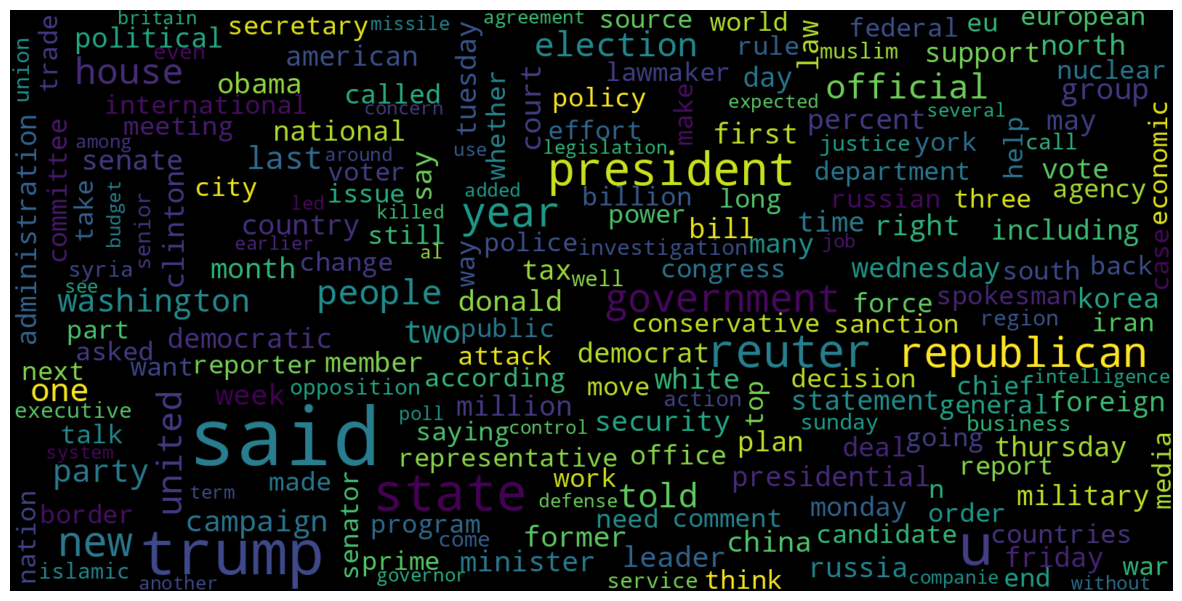

In [19]:
from wordcloud import WordCloud

# Real 
consolidated = ' '.join( 
    word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

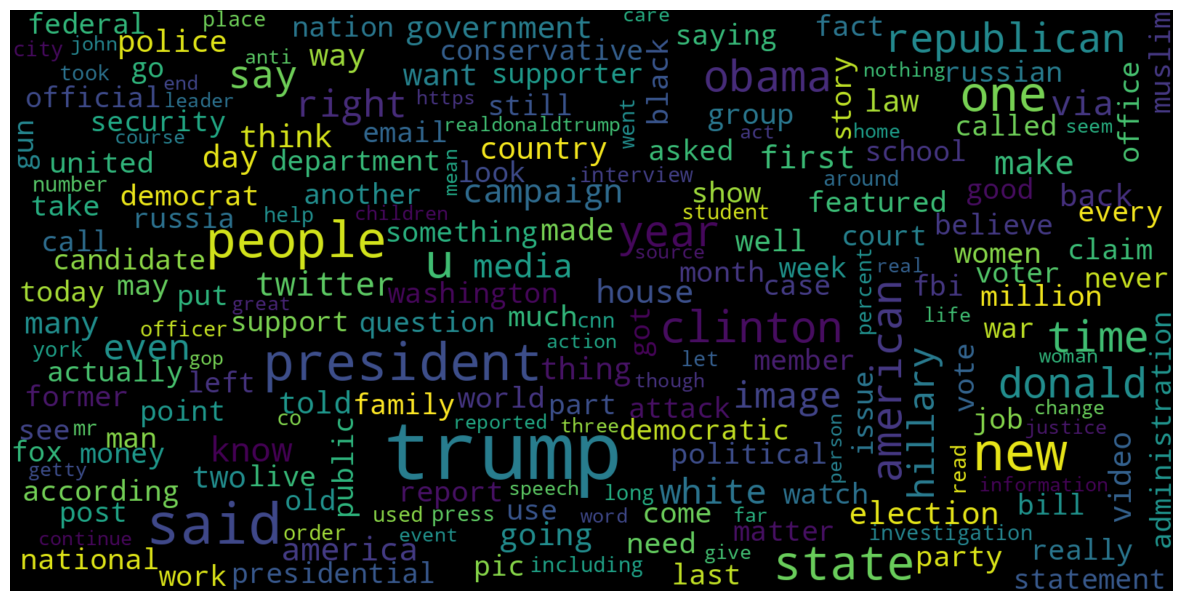

In [20]:

# Fake 
consolidated = ' '.join( 
    word for word in data['text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
                      height=800, 
                      random_state=21, 
                      max_font_size=110, 
                      collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

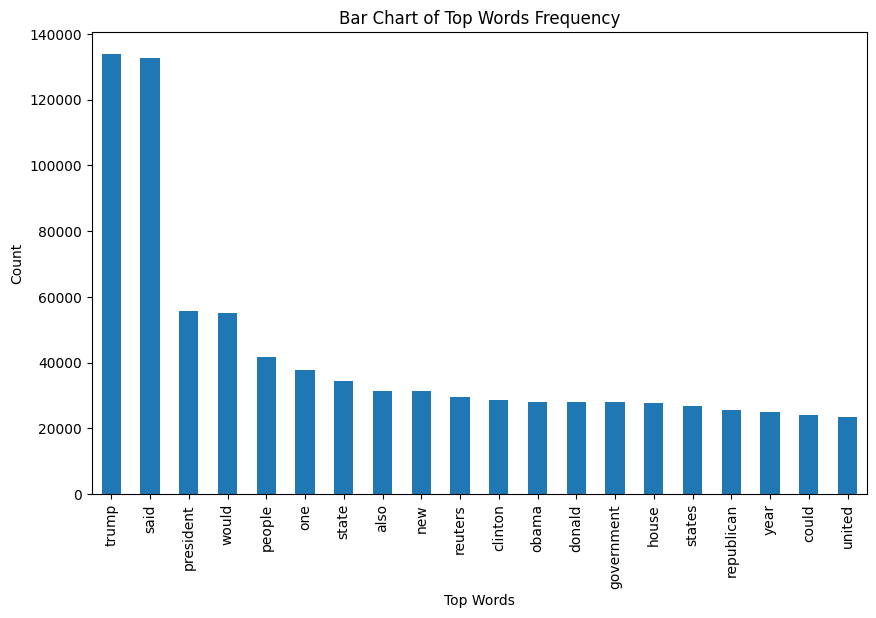

In [21]:

from sklearn.feature_extraction.text import CountVectorizer 
  
  
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 
  
  
common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(10, 6), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
) 

### Train-test split

In [22]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(data['text'],  
                                                    data['class'],  
                                                    test_size=0.25)

### Tfidf Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1) 
lr.fit(xv_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, lr.predict(xv_train))) 
print(accuracy_score(y_test, lr.predict(xv_test))) 

0.9915918949432527
0.9875222816399287


In [25]:
print(roc_auc_score(y_test, lr.predict(xv_test)))

0.9875342950280575


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(xv_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5910
           1       0.99      0.99      0.99      5310

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



### Decison Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier 
  
dt = DecisionTreeClassifier(random_state=1) 
dt.fit(xv_train, y_train) 
  
# testing the model 
print(accuracy_score(y_train, dt.predict(xv_train))) 
print(accuracy_score(y_test, dt.predict(xv_test))) 

0.999970289381425
0.9971479500891266


In [28]:
print(roc_auc_score(y_test, dt.predict(xv_test)))

0.997187568709551


In [29]:
print(classification_report(y_test, dt.predict(xv_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5910
           1       1.00      1.00      1.00      5310

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(xv_train, y_train)

# testing the model 
print(accuracy_score(y_train, rf.predict(xv_train))) 
print(accuracy_score(y_test, rf.predict(xv_test))) 

0.9991681026798978
0.9688948306595365


In [31]:
print(roc_auc_score(y_test, rf.predict(xv_test)))

0.9679118032254055


In [32]:
print(classification_report(y_test, rf.predict(xv_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5910
           1       0.98      0.95      0.97      5310

    accuracy                           0.97     11220
   macro avg       0.97      0.97      0.97     11220
weighted avg       0.97      0.97      0.97     11220



### Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(xv_train, y_train)

# testing the model 
print(accuracy_score(y_train, gbc.predict(xv_train))) 
print(accuracy_score(y_test, gbc.predict(xv_test))) 

0.9970883593796422
0.9950089126559715


In [34]:
print(roc_auc_score(y_test, gbc.predict(xv_test)))

0.9951188734979494


In [35]:
print(classification_report(y_test, gbc.predict(xv_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5910
           1       0.99      1.00      0.99      5310

    accuracy                           1.00     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       1.00      1.00      1.00     11220



### Save best model

In [36]:
# import joblib

# joblib.dump(vectorization, 'vectorizer.pkl')
# joblib.dump(dt, 'dt_model.pkl')

### Model Testing

In [37]:
def output_label(n):
    """
    Convert numerical label to human-readable label.

    Parameters:
    - n (int): Numerical label (0 or 1).

    Returns:
    - str: Human-readable label.
    """
    return "Fake News" if n == 0 else "Not A Fake News"
    
def manual_testing(news, models):
    """
    Perform manual testing on a given news article using multiple models.

    Parameters:
    - news (str): News article text for testing.
    - models (dict): Dictionary of models for predictions.

    Returns:
    - None: Prints the predictions for each model.
    """
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)

    predictions = {}
    for model_name, model in models.items():
        predictions[model_name] = model.predict(new_xv_test)[0]

    print("\n".join(f"{model_name} Prediction: {output_label(prediction)}" for model_name, prediction in predictions.items()))


In [38]:
# news = str(input())
news = data_fake_manual_testing.text.to_list()[1]
print(news)

# Example usage:
models = {"LR": lr, "DT": dt, "GBC": gbc, "RFC": rf}
manual_testing(news, models)

 By Dady Chery and Gilbert MercierAll writers with a desire to rattle people out of their torpor occasionally wonder if it is worthwhile to continue to try to raise their voices over the din of lies and distractions.More and more for us, such thoughts are occasioned, not by the mainstream, which predictably treats all the pronouncements from the powerful as being newsworthy, but by the fake left, which lobotomizes most of whom it touches. The increasing sophistication of this group and its rate of expansion are astounding. Its purpose is to annihilate and replace the real left, and it is making great strides in this regard.The real left includes those who, like Dr. Martin Luther King Jr. (MLK), came to realize that quantum leaps are the way to proceed, rather than tiny incremental change. The real left does not curry favor or approval from those in power; it challenges the social status quo and respects the inherent right of an injured and indignant population to rebel against authorit

In [39]:
news = data_true_manual_testing.text.to_list()[1]
print(news)

# Example usage:
models = {"LR": lr, "DT": dt, "GBC": gbc, "RFC": rf}
manual_testing(news, models)

GENEVA (Reuters) - North Korea and the United States clashed at a U.N. forum on Tuesday over their military intentions towards one another, with Pyongyang s envoy declaring it would  never  put its nuclear deterrent on the negotiating table. Japan, well within reach of North Korea s missiles, said the world must maintain pressure on the reclusive country to rein in its nuclear and missile programs and now was not the time for a resumption of multi-party talks. North Korea has pursued its weapons programs in defiance of U.N. Security Council sanctions and ignored all calls, including from major ally China, to stop, prompting a bellicose exchange of rhetoric between the North and the United States. North Korea justifies its weapons programs, including its recent threat to fire missiles towards the U.S. Pacific territory of Guam, by pointing to perceived U.S. hostility, such as military exercises with South Korea this week. U.S. disarmament ambassador Robert Wood told a U.N.-sponsored Con